# EDA


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/malik/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Importing Classification dataset
df = pd.read_csv("./Data/App Reviews-SingleLabel-Multiclass.csv")
df_multilabel = pd.read_csv("Data/App Reviews-Multilabel.csv")
df = df.merge(df_multilabel, on='review', how='inner')

In [3]:
df.head()

,review,Label,bug_report,improvement_request,rating,others
0,يبيله تصليحات كثير,bug_report,1,1,1,0
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,rating,0,1,1,1
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,improvement_request,0,1,1,0
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,rating,0,0,1,0
4,تبين م لي ي تم ل يب,others,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   review               2920 non-null   object
 1   Label                2920 non-null   object
 2   bug_report           2920 non-null   int64 
 3   improvement_request  2920 non-null   int64 
 4   rating               2920 non-null   int64 
 5   others               2920 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 137.0+ KB


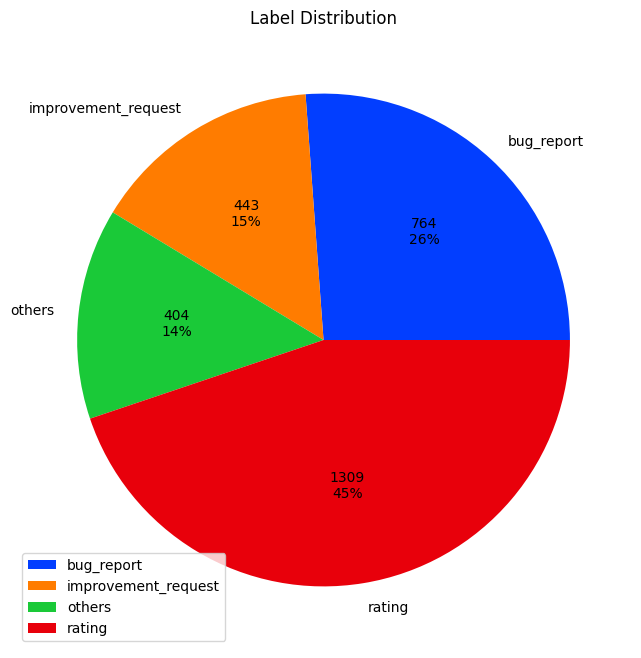

In [5]:
def label_function(val, total):
    return f'{val / 100 * total:.0f}\n{val:.0f}%'

def check_target_dist(data: pd.DataFrame):
    colors = sns.color_palette('bright')
    total = len(data)
    data.groupby("Label").size().plot(
        kind="pie",
        autopct=lambda val: label_function(val, total),
        colors=colors,
        wedgeprops={'linewidth': 1},
        legend=True,
        figsize=(8, 8)
    )
    plt.title("Label Distribution")
    plt.ylabel("")  # Optional: removes y-axis label
    plt.show()


check_target_dist(df)


In [6]:
def sentence_length_data(data: pd.Series):
	return df.review.apply(str.split).apply(len)

def sentence_length_distribution(data: pd.Series):
	sns.violinplot(data)
	sns.boxplot(data)
	plt.show()

In [7]:
sentence_length = sentence_length_data(df.review) 
longest_sentence = np.argmax(sentence_length)
print(f"Longest Sentence: {sentence_length[longest_sentence]}\n{df.review[longest_sentence]}")


Longest Sentence: 576
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد المحاولة
من فضلك أعد 

In [8]:
empty_sentences = len(sentence_length[sentence_length < 2])
print(f"Number of empty Sentence: {empty_sentences}")

Number of empty Sentence: 0


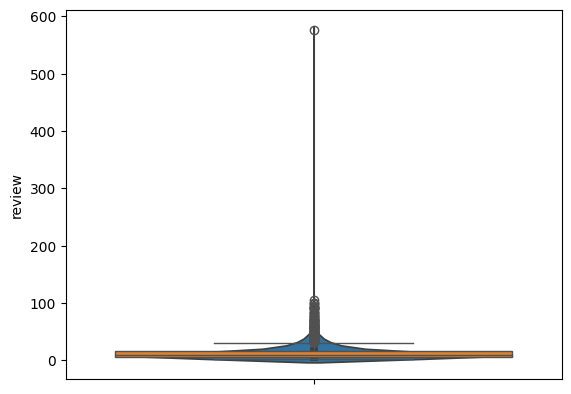

In [9]:
sentence_length_distribution(sentence_length)

In [10]:
Q1 = sentence_length.quantile(0.25)
Q3 = sentence_length.quantile(0.75)
IQR = Q3 - Q1

print("Q1", Q1)
print("Q3", Q3)
outliers = sentence_length[(sentence_length < Q1 - IQR) | (sentence_length > Q3 + IQR)]
print("Number of outliers: ", len(outliers))
print(f"Percentage of Total Entries {len(outliers)/len(df) * 100}%")

Q1 6.0
Q3 16.0
Number of outliers:  285
Percentage of Total Entries 9.76027397260274%


In [11]:
# See these sentences
df_outliers =df.iloc[outliers.index, :]
df_outliers.head()

,review,Label,bug_report,improvement_request,rating,others
23,والله فرحنا كثيراً بتطبيق مطبعة الملك فهد لكن ...,improvement_request,1,1,1,1
32,جيد بالنسبة إلى الأصدقاء الذين تعرفت عليهم وال...,improvement_request,1,1,1,1
34,المفروض بدل رأيك في الخدمات وملحقاتها مشكلتك ف...,improvement_request,0,1,1,0
55,شيء طالما انتظرناه مجهود جميل ورائع . إلى ما س...,improvement_request,1,1,1,1
73,ممتاز جدااا انصح استخدام البرنامج يحل لكم كل ا...,rating,0,1,1,0


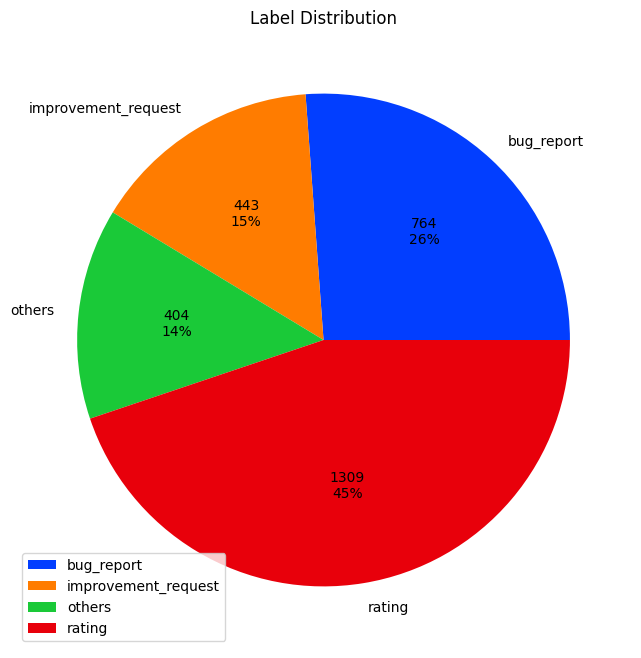

In [12]:
check_target_dist(df)

## Initial Analysis
- Seems like there are no NaN values in our targets nor the predictors.
- Imbalanced data as it is a classification task, this has to be remedied.
- Seems like we have an outlier in the length of our sentences. This would cause problems as most of our data is within 6 to 16 length. The outliers count to around 10% of our sentences, which is too high. Best course is to set our own limit to reviews. The goal is to remove the biggest sentences while preserving as much data as possible and keeping average sentence length as small as possible.


In [13]:
max_length = np.linspace(20, 60, 41) 
for length in max_length:
	print(f"Percentage of outliers with max length {length}: {len(sentence_length[sentence_length > length])/len(df) * 100}%")

Percentage of outliers with max length 20.0: 16.301369863013697%
Percentage of outliers with max length 21.0: 14.965753424657535%
Percentage of outliers with max length 22.0: 13.664383561643836%
Percentage of outliers with max length 23.0: 12.636986301369863%
Percentage of outliers with max length 24.0: 11.712328767123289%
Percentage of outliers with max length 25.0: 10.787671232876713%
Percentage of outliers with max length 26.0: 9.76027397260274%
Percentage of outliers with max length 27.0: 9.212328767123287%
Percentage of outliers with max length 28.0: 8.561643835616438%
Percentage of outliers with max length 29.0: 7.842465753424658%
Percentage of outliers with max length 30.0: 7.328767123287672%
Percentage of outliers with max length 31.0: 6.883561643835616%
Percentage of outliers with max length 32.0: 6.36986301369863%
Percentage of outliers with max length 33.0: 5.856164383561644%
Percentage of outliers with max length 34.0: 5.308219178082192%
Percentage of outliers with max leng

In [14]:
df.drop(index=sentence_length[sentence_length > 38].index, axis=1, inplace=True)

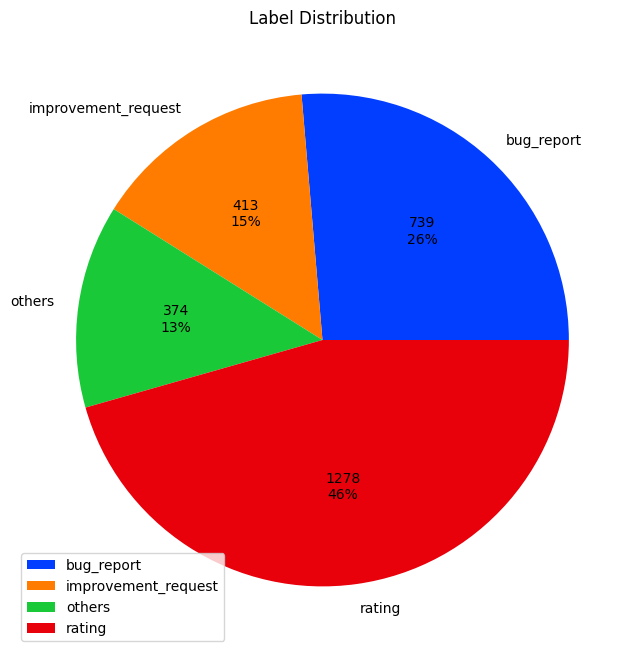

In [15]:
check_target_dist(df)

In [16]:
total = len(df)
num_classes = 4

class_counts = {
    "rating": 1267,
    "bug_report": 731,
    "improvement_request": 412,
    "others": 374
}

weights = [
    total / (num_classes * class_counts["bug_report"]),
    total / (num_classes * class_counts["improvement_request"]),
    total / (num_classes * class_counts["others"]),
    total / (num_classes * class_counts["rating"])
]
print(weights)

[0.9589603283173734, 1.7014563106796117, 1.874331550802139, 0.55327545382794]


## Preprocessing

### Label Encoding

## Text Preprocessing

In [17]:
import re
import nltk
import string
from nltk.corpus import stopwords
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.charmap import CharMapper
from camel_tools.utils.charsets import EMOJI_ALL_CHARSET
from camel_tools.morphology.analyzer import DEFAULT_NORMALIZE_MAP


In [18]:
nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /home/malik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
arabic_digits = [digit for digit in '٠١٢٣٤٥٦٧٨٩']
trans = str.maketrans('٠١٢٣٤٥٦٧٨٩', '0123456789')
def translate_numbers(text):
	return ''.join([char.translate(trans) for char in text])


In [20]:
ARABIC_PUNCTUATIONS = '،؛؟«»…ـ“”‘’'
ALL_PUNCTUATIONS = ARABIC_PUNCTUATIONS + string.punctuation
def remove_punctuations(text):
	text = re.sub(f"[{re.escape(ALL_PUNCTUATIONS)}]", "", text)
	text = re.sub(r"\s+", " ", text).strip()
	return text

In [21]:
def remove_unicode(text):
	text = re.sub(r"[^\u0600-\u06FFa-zA-Z0-9\s]", "", text)
	return text

In [22]:
def remove_stopwords(text):
	return ' '.join([word for word in text.split(' ') if word not in arabic_stopwords])

In [23]:
def remove_emojis(text):
	return ''.join([char for char in text if char not in EMOJI_ALL_CHARSET])

In [24]:
arclean = CharMapper.builtin_mapper("arclean")
arabic_stopwords = set(stopwords.words("arabic"))

URL_EMAIL_DIGITS_RE = re.compile(r"http\S+|www\.\S+|\S+@\S+|\d{4,}")
REPEAT_CHAR_RE = re.compile(r"(.)\1{2,}")
WHITESPACE_RE = re.compile(r"\s+")
# remove all punctuation except Arabic letters and digits
PUNCTUATION_RE = re.compile(r"[^\w\s\u0600-\u06FF]")
def clean(txt):
    # Deleting characters that are not in Arabic, ASCII, or Latin-1.
    # Converting all spacing characters to an ASCII space character.
    # Converting Indic digits into Arabic digits.
    # Converting extended Arabic letters into basic Arabic letters. جيم مشبعة
    # Converting 1-char presentation froms into simple basic forms. بسم الله
    txt = arclean(txt)

    ####### normalize, dediac
    txt = txt = DEFAULT_NORMALIZE_MAP.map_string(txt)
    txt = dediac_ar(txt)

    # urls, emails, more than 3 consecutive digits (could be phone numbers)
    txt = URL_EMAIL_DIGITS_RE.sub(" ", txt)
    # Collapse repeated chars >= 2
    txt = REPEAT_CHAR_RE.sub(r"\1", txt)

    # remove newlines, whitespace, punctuatio
    txt = WHITESPACE_RE.sub(" ", txt).strip()

    # remove stop words,
    txt = " ".join([word for word in txt.split(" ") if word not in arabic_stopwords])
    return txt

In [25]:
df_processed = df.copy()
for normalizer in [
	normalize_alef_ar,
	normalize_alef_maksura_ar,
	normalize_teh_marbuta_ar,
	dediac_ar,
	remove_emojis,
	translate_numbers,
	remove_stopwords,
	remove_punctuations,
	remove_unicode,
    clean]:

	df_processed.review = df_processed.review.apply(normalizer)

In [26]:
df_processed

,review,Label,bug_report,improvement_request,rating,others
0,يبيله تصليحات كثير,bug_report,1,1,1,0
1,ماتحملت ابدا ونا دفعت فلوس,rating,0,1,1,1
2,اتمني منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,improvement_request,0,1,1,0
3,ممتاز وبسيط وتشغيله يؤثر علي سرعه الانترنت,rating,0,0,1,0
4,تبين تم يب,others,0,0,1,1
...,...,...,...,...,...,...
2914,يعطي اشعار اخبار ولايوجد اخبار نرجو متابعه الب...,bug_report,1,0,0,0
2916,مرره معفن مدري الا بالقوه بيدخلنا موقعهم هذاك ...,rating,1,0,1,0
2917,لابد تطويره ليستفاد منو الجميع,improvement_request,0,1,1,0
2918,تطبيق اكثر رائع ومجهود مبارك ننتظر المزيد لاثر...,rating,0,1,1,0


In [27]:
def get_multilabel(row):
    return [row['bug_report'], row['improvement_request'], row['rating'], row['others']]

In [28]:
df_multiClass = df_processed.loc[:, ['review', 'Label']]
df_multiLabel = df_processed.loc[:, ['bug_report', 'improvement_request', 'rating', 'others']]
df_multiLabel['MultiLabel'] = df_processed.apply(get_multilabel, axis=1)
df_multiLabel.drop(columns=['bug_report', 'improvement_request', 'rating', 'others'], inplace=True)

In [29]:
df_multiClass

,review,Label
0,يبيله تصليحات كثير,bug_report
1,ماتحملت ابدا ونا دفعت فلوس,rating
2,اتمني منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,improvement_request
3,ممتاز وبسيط وتشغيله يؤثر علي سرعه الانترنت,rating
4,تبين تم يب,others
...,...,...
2914,يعطي اشعار اخبار ولايوجد اخبار نرجو متابعه الب...,bug_report
2916,مرره معفن مدري الا بالقوه بيدخلنا موقعهم هذاك ...,rating
2917,لابد تطويره ليستفاد منو الجميع,improvement_request
2918,تطبيق اكثر رائع ومجهود مبارك ننتظر المزيد لاثر...,rating


In [30]:
df_multiLabel

,MultiLabel
0,"[1, 1, 1, 0]"
1,"[0, 1, 1, 1]"
2,"[0, 1, 1, 0]"
3,"[0, 0, 1, 0]"
4,"[0, 0, 1, 1]"
...,...
2914,"[1, 0, 0, 0]"
2916,"[1, 0, 1, 0]"
2917,"[0, 1, 1, 0]"
2918,"[0, 1, 1, 0]"


In [31]:
# We split the data to only oversample the train and not the test
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_multiClass['review'], df_multiClass['Label'], 
                                                    test_size=0.2, stratify=df_multiClass['Label'], random_state=777)

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, 
                                                    test_size=0.15, stratify=train_y, random_state=777)

In [32]:
len(train_X), len(val_X), len(test_X)

(1906, 337, 561)

In [33]:
df_train = pd.DataFrame({'review': train_X, 'Label': train_y})
df_train= df_train.merge(df_multiLabel, left_index=True, right_index=True, how='inner')
df_val = pd.DataFrame({'review': val_X, 'Label': val_y})
df_val= df_val.merge(df_multiLabel, left_index=True, right_index=True, how='inner')
df_test = pd.DataFrame({'review': test_X, 'Label': test_y})
df_test=df_test.merge(df_multiLabel, left_index=True, right_index=True, how='inner')

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [34]:
len(df_train), len(df_val), len(df_test)

(1906, 337, 561)

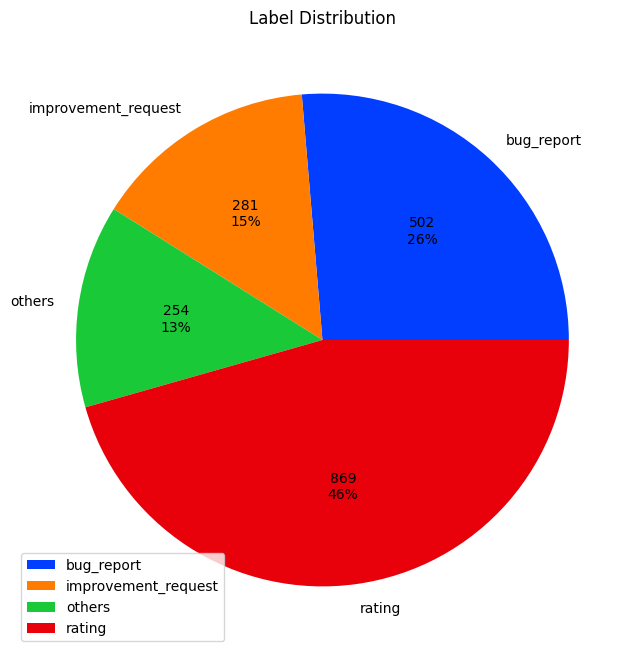

In [35]:
check_target_dist(df_train)

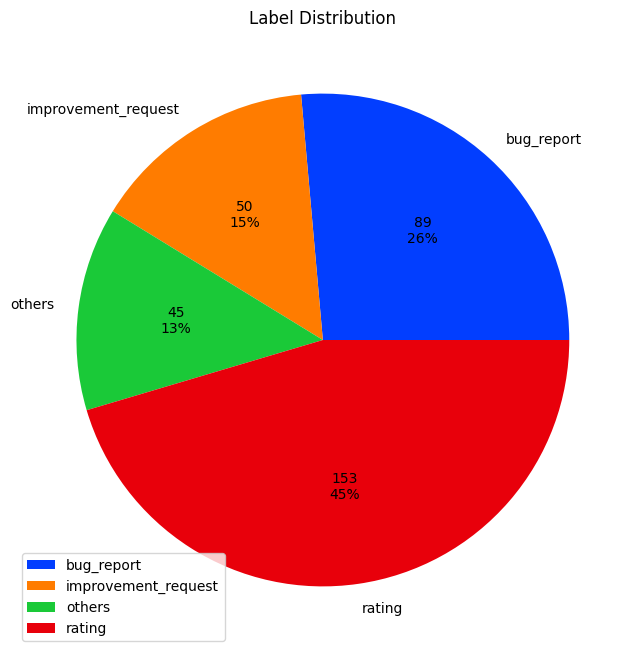

In [36]:
check_target_dist(df_val)

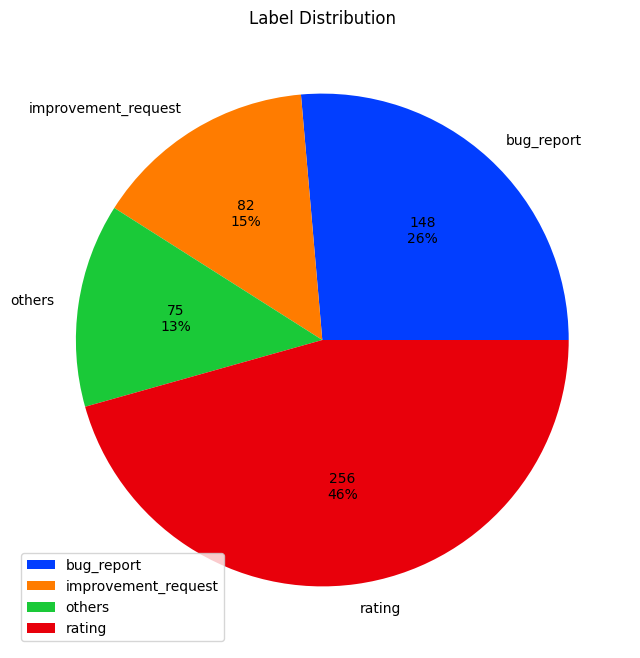

In [37]:
check_target_dist(df_test)

In [38]:
# Oversample by paraphrasing using llm
import ollama
def rephrase(row):
    print("Input:", row['review'])
    prompt = f"""
    أعد صياغة الجملة العربية التالية باستخدام مرادفات من اللغة العربية فقط لبعض الكلمات مع الحفاظ على المعنى الأصلي. 
    لا تستخدم كلمات من لغات أخرى. لا تشرح. لا تبرر. لا تكتب أي شيء غير الجملة الجديدة. لا تبدأ بكلمة "حسنًا" أو "بالطبع" أو أي تمهيد. 
    فقط أعد كتابة الجملة المعاد صياغتها مباشرة. يجب ألا تتجاوز 30 كلمة.
    
    أمثلة:
    
    المدرس كان جيدًا ويشرح الدروس بوضوح
    المعلم كان ممتازًا ويوضح الدروس بشكل جيد
    
    هل يمكنني الحصول على المساعدة في هذا الأمر؟
    هل أستطيع الحصول على العون في هذا الموضوع؟
    
    {row['review']}
    """

    res=ollama.chat(
        model='llama3.2:3b-instruct-fp16',
        messages=[{"role": "user", "content": prompt}]
    )
    print("Result: ", res.message.content)
    if len(res.message.content.split(" ")) > 25:
        return
    return pd.Series({'review': res.message.content, 'Label': row['Label'], 'MultiLabel': row['MultiLabel']})


In [39]:
sentence_len = df_train.review.apply(str.split).apply(len)

In [40]:
others = df_train[(df_train.Label == "others") & (sentence_len < 30)]
num_rows = len(others)
extra = others.sample(frac=0.6, replace=True, random_state=42) 
expanded = pd.concat([others, extra], ignore_index=True)
print(f"Generating {len(expanded)} samples")
others = expanded.apply(rephrase, axis=1)

Generating 400 samples
Input: الباس طويله 12 خانه وبرضوا مايقبل
Result:  المدرس كان ممتازًا ويشرح الدروس بوضوح.
Input: لانه زق ووهمين اغبياء
Result:  الطلاب كانوا عاجزينًا ويحتاجون إلى المانع
Input: الي الامام لدحر الشرذمه
Result:  المدرس كان رفيقًا ويشرح الدروس بوضوح.
Input: يمكن تشبعك عشان بنات مولعه اكثر منك
Result:  المدرس كان جيدًا ويشرح الدروس بوضوح.
المعلم كان متميزًا ويشرح الدروس بشكل دقيق.
Input: اين اجد الرقم الوطني الخاص
Result:  المدير كان متميزًا ويمارس مهاراته بشكل فعال.
Input: يتم الغاء مقاطع تحمل اسم برنامج اخر ان البرنامج الاخر يتم النشر خلاله لمقاطع تحمل شعار لايكي ولم يتم الغائها او شطبها يثبت وجوده داخل السوشل ميديا
Result:  المدرس كان جيدًا ويشرح الدروس بوضوح.
المعلم كان ممتازًا ويوضح الدروس بشكل جيد.
أستطيع الحصول على العون في هذا الموضوع.
أستطيع الحصول على المساعدة في هذا الأمر.
Input: ابو ضيف الله عبدالله بن مفلح الجهمي
Result:  المدير كان عظيمًا ويشرح الكلمات بشكل واضح.
Input: زسظسك0ثصم غنل بويز ؤه بتمطر
Result:  المدير كان جيدًا ويشرح الإجراءات بوضوح.
Input: غ

In [41]:
others.reset_index(drop=True, inplace=True)
others.dropna(inplace=True)
others.isna().sum()

review        0
Label         0
MultiLabel    0
dtype: int64

In [42]:
others.head()

,review,Label,MultiLabel
0,المدرس كان ممتازًا ويشرح الدروس بوضوح.,others,"[1, 1, 0, 1]"
1,الطلاب كانوا عاجزينًا ويحتاجون إلى المانع,others,"[0, 0, 1, 1]"
2,المدرس كان رفيقًا ويشرح الدروس بوضوح.,others,"[0, 0, 1, 1]"
3,المدرس كان جيدًا ويشرح الدروس بوضوح.\nالمعلم ك...,others,"[0, 0, 0, 1]"
4,المدير كان متميزًا ويمارس مهاراته بشكل فعال.,others,"[0, 0, 0, 1]"


In [54]:
improvement_request = df_train[(df_train.Label == "improvement_request") & (sentence_len < 30)]
print(f"Generating {len(improvement_request)} samples")
improvement_request = improvement_request.apply(rephrase, axis=1)

Generating 277 samples
Input: رائع فعلا الاحظ مشكله انه يستهلك البطاريه اكثر المعتاد فياريت فعلا مشكله يتم معالجتها
Result:  المدرس كان ممتازًا ويشرح الدروس بوضوح.
Input: سلام عليكم ارجو منكم تخفيض سعر التوصيل المنزل قريب المطعم فرق 4 كيلو ارجو مراجعه الطلب سعر التوصيل فايق التحيه التقدير تحياتي
Result:  المدرس كان جيدًا ويشرح الدروس بوضوح.
Input: رجعو التحديث الي هاذا احسن بكثير التحديث الجديد تطوير الدفاعات والمباني صعب جدا
Result:  المدير كان جيدًا ويشرح المشاريع بوضوح.
Input: السلام عليكم ورحمه الله وبركاته البرنامج جميل جدا ناقصه اضافه ميزه وجعل المقطع كانت مدته يكون سنابه واحده بدون تقطيع
Result:  المدير كان جيدًا ويشرح الفنون بوضوح. هل أستطيع الحصول على العون في هذا الموضوع؟
Input: البلاغات تشمل فقط شركات الاتصالات يتم اضافه البريد للتطبيق
Result:  المدرس كان مرئيًا ويشرح الدروس بوضوح.
Input: اللعبه حلوه تضيف عرف اكثر حتكون احلا كمان تضيف شخصيات اكثر اللعبه حتكون اكثر حلاوه
Result:  الممثل كان جيدًا ويشرح الأدوار بوضوح.
Input: برنامج جميل جدا يوجد مشكله يرجي اضافه عكس الكامره مج

In [56]:
improvement_request.reset_index(drop=True, inplace=True)
improvement_request.dropna(inplace=True)
improvement_request.isna().sum()

review        0
Label         0
MultiLabel    0
dtype: int64

In [57]:
improvement_request.head()

,review,Label,MultiLabel
0,المدرس كان ممتازًا ويشرح الدروس بوضوح.,improvement_request,"[1, 1, 1, 0]"
1,المدرس كان جيدًا ويشرح الدروس بوضوح.,improvement_request,"[0, 1, 1, 0]"
2,المدير كان جيدًا ويشرح المشاريع بوضوح.,improvement_request,"[0, 1, 1, 0]"
3,المدير كان جيدًا ويشرح الفنون بوضوح. هل أستطيع...,improvement_request,"[0, 1, 1, 0]"
4,المدرس كان مرئيًا ويشرح الدروس بوضوح.,improvement_request,"[0, 1, 0, 1]"


In [46]:
bug_report = df_train[(df_train.Label == "bug_report") & (sentence_len < 30)]
bug_report = bug_report.sample(frac=0.33, replace=True, random_state=42)  
print(f"Generating {len(bug_report)} samples")
bug_report = bug_report.apply(rephrase, axis=1)

Generating 164 samples
Input: التطبيق يعمل
Result:  الاستudent كان مستعدًا ويطلب الدعم.
Input: خطا داخلي الخادم هاذ يطلعلي ابي ادخل مشكلواجد
Result:  المدرس كان ممتازًا ويشرح الدروس بوضوح.
Input: شغال معي وله اربع ايام يطلعني وش السبب
Result:  المعلم كان متميزًا ويشرح الدروس بفضول.
Input: قمت بالتحديث الاخير ولم يعد يعمل
Result:  المدرس كان متميزًا ويشرح الدروس بوضوح.
Input: التحديث جدا سيء اختفت عناوين المجلدات بينهم فراغ شاسع اي اهميه
Result:  المدرس كان جيدًا ويشرح الدروس بوضوح
المعلم كان ممتازًا ويوضح الدروس بشكل جيد
لا أستطيع الحصول على المساعدة في هذا الأمر
أستطيع الحصول على العون في هذا الموضوع
التحديث سيء واختفت عناوين المجلدات بينهم فراغ شاسع وأي إهانة
Input: التطبيق يومين يعمل
Result:  المدرس كان جيدًا ويشرح الدروس بوضوح.
Input: للاسف عمليه سرقه شركه عالميه عندما اقوم بالغاء الخطه يتم الغاء واخذ المساحه قمت بشراها يتم الغاءها وقد قمت بدفع المال مقبل المساحه 2تيرابايت
Result:  المدرسين جيدون ويشرحون الدروس بوضوح
المعلم ممتاز ويوضح الدروس بشكل جيد
لا أستطيع الحصول على العون
أست

In [47]:
bug_report.reset_index(drop=True, inplace=True)
bug_report.dropna(inplace=True)
bug_report.isna().sum()

review        0
Label         0
MultiLabel    0
dtype: int64

In [48]:
bug_report.head()

,review,Label,MultiLabel
0,الاستudent كان مستعدًا ويطلب الدعم.,bug_report,"[1, 0, 0, 0]"
1,المدرس كان ممتازًا ويشرح الدروس بوضوح.,bug_report,"[1, 0, 0, 0]"
2,المعلم كان متميزًا ويشرح الدروس بفضول.,bug_report,"[1, 1, 0, 0]"
3,المدرس كان متميزًا ويشرح الدروس بوضوح.,bug_report,"[1, 0, 0, 0]"
5,المدرس كان جيدًا ويشرح الدروس بوضوح.,bug_report,"[1, 0, 0, 0]"


In [58]:
arclean = CharMapper.builtin_mapper("arclean")
arabic_stopwords = set(stopwords.words("arabic"))

URL_EMAIL_DIGITS_RE = re.compile(r"http\S+|www\.\S+|\S+@\S+|\d{4,}")
REPEAT_CHAR_RE = re.compile(r"(.)\1{2,}")
WHITESPACE_RE = re.compile(r"\s+")
# remove all punctuation except Arabic letters and digits
PUNCTUATION_RE = re.compile(r"[^\w\s\u0600-\u06FF]")

In [59]:
for normalizer in [
	normalize_alef_ar,
	normalize_alef_maksura_ar,
	normalize_teh_marbuta_ar,
    dediac_ar,
    remove_emojis,
    translate_numbers,
    remove_stopwords,
    remove_punctuations,
    remove_unicode,
    clean]:
    
    improvement_request.review = improvement_request.review.apply(normalizer)
    others.review = others.review.apply(normalizer)
    bug_report.review = bug_report.review.apply(normalizer)
    
df_train_new = pd.concat(
    [df_train, improvement_request, others, bug_report],
    axis=0, 
    ignore_index=True
)


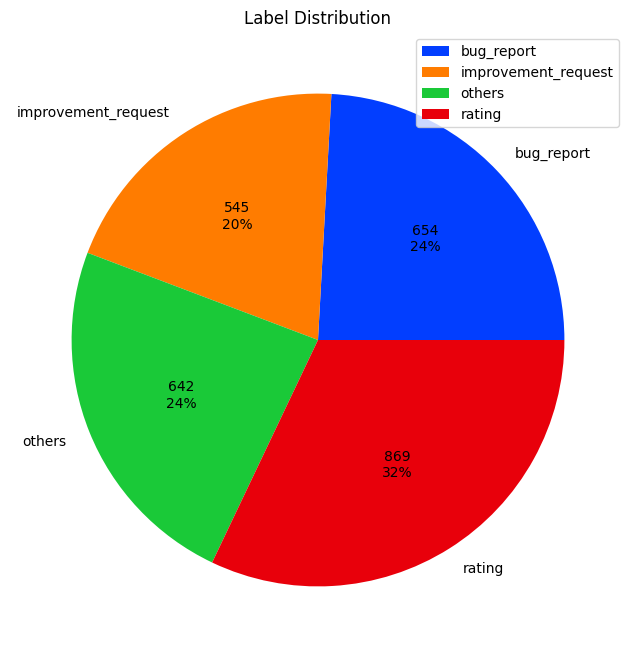

In [60]:
check_target_dist(df_train_new)

In [61]:
idx = df_train_new[df_train_new.Label == 'rating'].sample(frac=0.2, replace=True, random_state=42).index
df_train_new.drop(index=idx, inplace=True)
df_train_new.reset_index(drop=True, inplace=True)

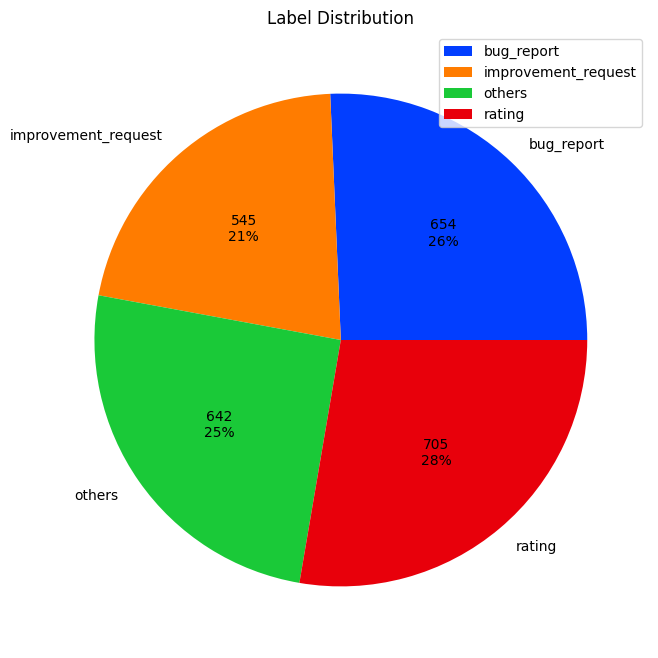

In [62]:
check_target_dist(df_train_new)

In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
onehot = OneHotEncoder(sparse_output=False)

df_train['class'] = encoder.fit_transform(df_train['Label'])
df_train_new['class'] = encoder.fit_transform(df_train_new['Label'])
df_val['class'] = encoder.transform(df_val['Label'])
df_test['class'] = encoder.transform(df_test['Label'])
df_train['onehot_class'] = onehot.fit_transform(df_train['Label'].to_numpy().reshape(-1, 1)).tolist()
df_train_new['onehot_class'] = onehot.fit_transform(df_train_new['Label'].to_numpy().reshape(-1, 1)).tolist()
df_val['onehot_class'] = onehot.transform(df_val['Label'].to_numpy().reshape(-1, 1)).tolist()
df_test['onehot_class'] = onehot.transform(df_test['Label'].to_numpy().reshape(-1, 1)).tolist()


### Check word count again

In [64]:
sentence_length = sentence_length_data(df_processed.review)
longest_idx = np.argmax(sentence_length)
max_len =sentence_length.max() 
print(f"Longest Sentence: {max_len}\n{df_processed.review[longest_idx]}")

Longest Sentence: 38
ماتصلح اطفال


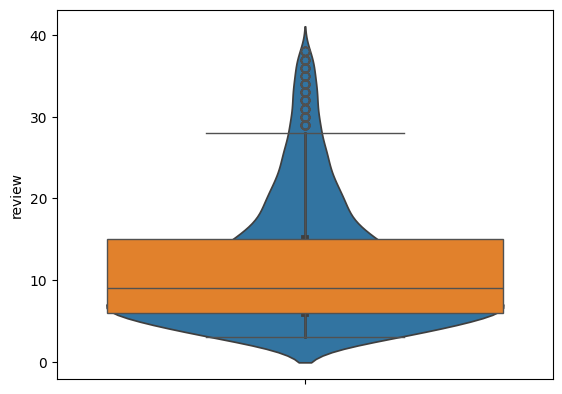

In [65]:
sentence_length_distribution(sentence_length)

## Tokenize

In [66]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("akhooli/Arabic-SBERT-100K")

2025-05-10 20:49:04.994176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746899345.005989    8999 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746899345.009590    8999 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746899345.018498    8999 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746899345.018515    8999 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746899345.018516    8999 computation_placer.cc:177] computation placer alr

In [67]:
import numpy as np 
from camel_tools.tokenizers.word import simple_word_tokenize
from transformers import AutoTokenizer

In [68]:
mar_tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/MARBERTv2")
mar_tokenizer.padding_side='left'

In [69]:
def tokenize_train(df: pd.DataFrame, max_len=128):
    vocab = set(["<START>", "<END>", "<PAD>"])
    word2idx = {"<PAD>": 0, "<START>": 1, "<END>": 2}
    idx = 3
    tokenized = [simple_word_tokenize(sentence) for sentence in df.review]
    df['tokenized'] = [[] for _ in range(len(df))]

    for i, review in enumerate(tokenized):
        sentence = [1]  # <START>
        sentence.extend([0] * (max_len - len(review)))
        for word in review:
            if word not in vocab:
                vocab.add(word)
                word2idx[word] = idx
                idx += 1
            sentence.append(word2idx[word])
        sentence.append(2)  # <END>
        df.at[i, 'tokenized'].extend(sentence)

    return df, vocab, word2idx, max_len

In [70]:
df_train_balanced, vocab_balanced, word2idx_balanced, max_len = tokenize_train(df_train_new, max_len=50) 
df_train_unbalanced, vocab_unbalanced, word2idx_unbalanced, max_len = tokenize_train(df_train, max_len=50) 

In [71]:
print(len(df_train_balanced) == sum(df_train_balanced['tokenized'].apply(len) == 52))
print(len(df_train_unbalanced) == sum(df_train_unbalanced['tokenized'].apply(len) == 52))

True
True


In [72]:
def tokenize_with_vocab(df: pd.DataFrame, word2idx: dict, max_len: int):
    df['tokenized'] = [[] for _ in range(len(df))]
    tokenized = [simple_word_tokenize(sentence) for sentence in df.review]
    for i, review in enumerate(tokenized):
        sentence = [1] 
        sentence.extend([0] * (max_len - len(review)))
        for word in review:
            if word in word2idx.keys():
                sentence.append(word2idx[word])
            else:
                sentence.append(0)
        sentence.append(2) 
        df.at[i, 'tokenized'] = sentence
    
    return df

In [73]:
df_val_unbalanced = tokenize_with_vocab(df_val, word2idx_unbalanced, 50)
df_test_unbalanced = tokenize_with_vocab(df_test, word2idx_unbalanced, 50)

In [74]:
df_val_balanced = tokenize_with_vocab(df_val, word2idx_balanced, 50)
df_test_balanced = tokenize_with_vocab(df_test, word2idx_balanced, 50)

In [75]:
df_train_balanced['precomputed_embeddings'] = df_train_balanced['review'].apply(model.encode)
df_train_balanced['marbert_tokens'] = df_train_balanced['review'].apply(mar_tokenizer, padding="max_length", max_length=200, return_attention_mask=True)

In [76]:
df_train_unbalanced['precomputed_embeddings'] = df_train_unbalanced['review'].apply(model.encode)
df_train_unbalanced['marbert_tokens'] = df_train_unbalanced['review'].apply(mar_tokenizer, padding="max_length", max_length=200, return_attention_mask=True)

In [77]:
df_val['precomputed_embeddings'] = df_val['review'].apply(model.encode)
df_val['marbert_tokens'] = df_val['review'].apply(mar_tokenizer, padding="max_length", max_length=200, return_attention_mask=True)

In [78]:
df_test['precomputed_embeddings'] = df_test['review'].apply(model.encode)
df_test['marbert_tokens'] = df_test['review'].apply(mar_tokenizer, padding="max_length", max_length=200, return_attention_mask=True)

In [79]:
import pickle
with open('train_balanced.pkl', 'wb') as f:
	pickle.dump(df_train_balanced, f)
with open('val_balanced.pkl', 'wb') as f:
	pickle.dump(df_val_balanced, f)
with open('test_balanced.pkl', 'wb') as f:
	pickle.dump(df_test_balanced, f)
with open('train_unbalanced.pkl', 'wb') as f:
	pickle.dump(df_train_unbalanced, f)
with open('val_unbalanced.pkl', 'wb') as f:
	pickle.dump(df_val_unbalanced, f)
with open('test_unbalanced.pkl', 'wb') as f:
	pickle.dump(df_test_unbalanced, f)

In [80]:
with open("vocab_unbalanced.txt", "w") as f:
	[f.write(word + " ") for word in vocab_unbalanced]
with open("vocab_balanced.txt", "w") as f:
	[f.write(word + " ") for word in vocab_balanced]

In [ ]:
len(vocab)